# Sentimental Analysis On Flipkart Product

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from bs4 import BeautifulSoup
import requests
cust_name=[]
cust_review=[]
for i in range(1,15):
  url="https://www.flipkart.com/redmi-10-midnight-black-64-gb/product-reviews/itmd93641e4ebb47?pid=MOBGC9GYEBH3GZ4E&lid=LSTMOBGC9GYEBH3GZ4ESWAKTT&marketplace=FLIPKART&page="+str(i)
  request=requests.get(url)
  soup=BeautifulSoup(request.content,'html.parser')
  name=soup.find_all('p',attrs={'class':'_2sc7ZR _2V5EHH'})
  review = soup.find_all("div",attrs={"class":"t-ZTKy"})
  for i in range(0,len(name)):
    cust_name.append(name[i].get_text())
  for i in range(0,len(review)):
    cust_review.append(review[i].get_text())
  


#Importing the Regular Expression For cleaning the information and nlp libraries

In [ ]:
import re

Importing the natural Language Processing libraries make it more clean

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Stemming the data for extracting the root word
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()

Storing the cleaned data

In [ ]:
# Getting the cleaned data
customer_review =[]
for i in range(0, len(cust_review)):
  review = re.sub('[^a-zA-Z]',' ',cust_review[i])  # Extracting the alphabets with the help of regular expression
  review = review.lower()
  review = review.split()
  # After that we have applied the list comprehension
  review = [ps.stem(i) for i in review if not i in stopwords.words('english')] # Removing the stopwords such as Stop words are a set of commonly used words in a language like grammatical words.
  review = ' '.join(review)
  customer_review.append(review)


In [ ]:
customer_name =[]
for i in range(0, len(cust_name)):
  review = re.sub('[^a-zA-Z]',' ',cust_name[i])  # Extracting the alphabets with the help of regular expression
  review = review.lower()
  review = review.split()
  # After that we have applied the list comprehension
  review = [ps.stem(i) for i in review if not i in stopwords.words('english')] # Removing the stopwords such as Stop words are a set of commonly used words in a language like grammatical words.
  review = ' '.join(review)
  customer_name.append(review)

In [ ]:
customer_name

['rupam dhara',
 'soumadip mondal',
 'kuldeep singh',
 'nilesh gaidhani',
 'flipkart custom',
 'nitish gaurav',
 'rahul dhochak',
 'deepak kumar shrivastava',
 'amal varghes',
 'jegadeesan ramalingam',
 'sharda verma',
 'manish kaushik',
 'flipkart custom',
 'flipkart custom',
 'ujjwal singh',
 'flipkart custom',
 'flipkart custom',
 'mohd ashraf mohd ashraf zargar',
 'flipkart custom',
 'hasan',
 'silambarasan',
 'sagar pawar',
 'flipkart custom',
 'ankit rastogi',
 'razim mohmedan',
 'shankar gs',
 'akshay tyagi',
 'sahzad saif',
 'mohan naik',
 'chandu nishad',
 'flipkart custom',
 'flipkart custom',
 'polo babu',
 'flipkart custom',
 'niraj kumar',
 'chaithra k g',
 'ravi kumar',
 'manali chakrabarti',
 'chitra dubey',
 'flipkart custom',
 'deepti sharma',
 'kripasindhu da',
 'eswaran r',
 'mamta pandit',
 'anil payghan',
 'flipkart custom',
 'saptarsi masanta',
 'flipkart custom',
 'smaranika tarai',
 'akhil b krishnan',
 'samiul hoqu',
 'sudarshan sikdar',
 'rocki kumar',
 'adith

# Making the dataframe

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data={'name':customer_name,'review':customer_review}

In [ ]:
data=pd.DataFrame(data)

In [ ]:
data.head()

,name,review
0,rupam dhara,good phone price rang batteri backup good came...
1,soumadip mondal,nice mobil perform good camera qualiti good go...
2,kuldeep singh,good phone nice work good perform nice lookread
3,nilesh gaidhani,phone camera good use first phone buyerbatteri...
4,flipkart custom,better backup osm an camer clariti good happi ...


# To analyze the sentiment for the statement we are importing the textblob library

In [ ]:
from textblob import TextBlob

In [ ]:
polarity=[] # It is the backbone of the sentiment analysis,which lie between [-1,1]
subjectivity=[] # It is the personal opinion of the matter which generally lie between [0,1]
for i in data['review']:
  i=TextBlob(i)
  polarity.append(i.sentiment.polarity)
  subjectivity.append(i.sentiment.subjectivity)

In [ ]:
data['polarity']=polarity

In [ ]:
data['subjectivity']=subjectivity

In [ ]:
data.head()

,name,review,polarity,subjectivity
0,rupam dhara,good phone price rang batteri backup good came...,0.542857,0.571429
1,soumadip mondal,nice mobil perform good camera qualiti good go...,0.640000,0.680000
2,kuldeep singh,good phone nice work good perform nice lookread,0.650000,0.800000
3,nilesh gaidhani,phone camera good use first phone buyerbatteri...,0.238413,0.502857
4,flipkart custom,better backup osm an camer clariti good happi ...,0.633333,0.566667


In [ ]:
# To convert the polarity into sentimental categories i.e. positive,negative,neutral
for i in range(0,len(data['polarity'])):
  if data['polarity'][i]<0:
    data['polarity'][i]='negative'
  elif data['polarity'][i]==0:
    data['polarity'][i]='neutral'
  else:
    data['polarity'][i]='positive'

In [ ]:
for i in range(0,len(data['subjectivity'])):
  if data['subjectivity'][i]<0.5:
    data['subjectivity'][i]='Average'
  else:
    data['subjectivity'][i]='good' 
    

In [ ]:
data.head()

,name,review,polarity,subjectivity
0,rupam dhara,good phone price rang batteri backup good came...,positive,good
1,soumadip mondal,nice mobil perform good camera qualiti good go...,positive,good
2,kuldeep singh,good phone nice work good perform nice lookread,positive,good
3,nilesh gaidhani,phone camera good use first phone buyerbatteri...,positive,good
4,flipkart custom,better backup osm an camer clariti good happi ...,positive,good


In [ ]:
data.shape

(140, 4)

In [ ]:
data.tail()

,name,review,polarity,subjectivity
135,purnima sadhukhan,faulti touch pad problem start product return ...,neutral,Average
136,maheshbabu p,mobil get heatread,neutral,Average
137,prakash gongadashettimath,met minimum expect front camera worst ever use...,negative,Average
138,md zaid khan,great budget phon buy dual app featur great bu...,positive,good
139,debasish choudhuri,goodread,neutral,Average


# Model Building  and prediction

In [ ]:
# Making X and y for machine learning
X=data['review']
y=data['polarity']

In [ ]:
# Converting the y column into numerical one
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [ ]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0,
       2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 0, 2, 1])

In [ ]:
# Converting the review into numerical vector to go for model building
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=1000)
X=tfidf.fit_transform(X).toarray()

In [ ]:
X.shape

(140, 524)

In [ ]:
# Importing the train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=0)

In [ ]:
# Importing the machine learning model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model=model.fit(X_train,y_train)
clf=model.predict(X_test)

In [ ]:
# Importing the Accuracy Score
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(clf,y_test))
print(classification_report(clf,y_test))

[[ 0  0  0]
 [ 3  5  2]
 [ 1  0 24]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67        10
           2       0.92      0.96      0.94        25

    accuracy                           0.83        35
   macro avg       0.64      0.49      0.54        35
weighted avg       0.95      0.83      0.86        35



# Visualization

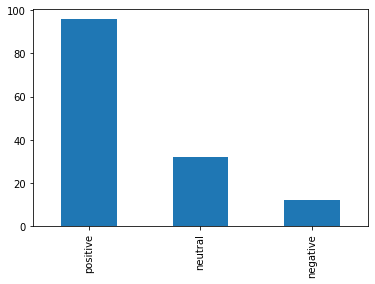

In [ ]:
# Importing the Graph as No. of different sentiments as per the polarity for this particular phone
data['polarity'].value_counts().plot(kind='bar')

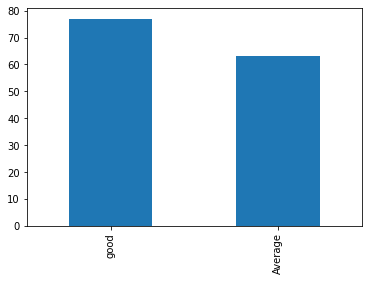

In [ ]:
# Importing the Graph as No. of different sentiments as per the subjectivity parametre for this particular phone
data['subjectivity'].value_counts().plot(kind='bar')

# Going for Deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('sentiment.sav','wb'))